### **CHATBOT WITH LANGGRAPH**

**Here is a phase one in this phase one define some common notation**

In [1]:
import os
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"]= GROQ_API_KEY

In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama-3.1-8b-instant")
llm.invoke("hi").content

d:\LangGraph-End-to-End-Course\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'How can I assist you today?'

### **This is all the import statement**

In [3]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

### **Here is a my call model Function**

https://github.com/langchain-ai/langgraph/tree/main/libs/langgraph/langgraph/graph

In [4]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

#### Here is my workflow

In [5]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

### **Here is my visualization**

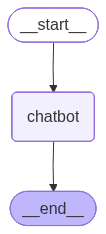

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

## **Here i am invoking the Graph**

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [7]:
input={"messages":["hi, my name is sunny"]}

In [8]:
app.invoke(input)

{'messages': [HumanMessage(content='hi, my name is sunny', additional_kwargs={}, response_metadata={}, id='859bad15-7c09-4330-9e6f-06b77e17006b'),
  AIMessage(content="Hi Sunny, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 41, 'total_tokens': 67, 'completion_time': 0.029244349, 'completion_tokens_details': None, 'prompt_time': 0.001986091, 'prompt_tokens_details': None, 'queue_time': 0.005348115, 'total_time': 0.03123044}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c16-5931-7590-b4ef-021bc6f57774-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 26, 'total_tokens': 67})]}

#### Here i am streaming the output

In [9]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content="Hello Sunny, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 41, 'total_tokens': 67, 'completion_time': 0.023885964, 'completion_tokens_details': None, 'prompt_time': 0.002492072, 'prompt_tokens_details': None, 'queue_time': 0.005548497, 'total_time': 0.026378036}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c16-5a5e-7f73-a1a9-caeb8f2beb13-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 26, 'total_tokens': 67})]}




## **starting phase2 from here with tool**

### **Lets first add the custom tool**

In [10]:
@tool
def search(query: str):
    """this is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

In [11]:
search.invoke("what is a temprature in sf?")

"It's 60 degrees and foggy."

In [12]:
search.invoke("what is a weather in india?")

"It's 90 degrees and sunny."

In [13]:
tools=[search]

In [14]:
tools

[StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000029B68744B80>)]

In [15]:
tool_node=ToolNode(tools)

In [16]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts={'config': ('N/A', <class 'inspect._empty'>), 'runtime': ('N/A', <class 'inspect._empty'>)}, _tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000029B68744B80>)}, _injected_args={'search': _InjectedArgs(state={}, store=None, runtime=None)}, _handle_tool_errors=<function _default_handle_tool_errors at 0x0000029B0EC00220>, _messages_key='messages', _wrap_tool_call=None, _awrap_tool_call=None)

In [17]:
llm_with_tool=llm.bind_tools(tools)

In [18]:
llm_with_tool.invoke("hi")

AIMessage(content="I'm happy to help you with your query. What would you like to do?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 209, 'total_tokens': 227, 'completion_time': 0.043316751, 'completion_tokens_details': None, 'prompt_time': 0.014385727, 'prompt_tokens_details': None, 'queue_time': 0.006171599, 'total_time': 0.057702478}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c16-5bd7-7623-ba8e-dbaa97175a0d-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 209, 'output_tokens': 18, 'total_tokens': 227})

### **Here is a my call model binding with tool**

In [19]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [20]:
response=call_model({"messages": ["hi how are you?"]})

In [21]:
response

{'messages': [AIMessage(content="I'm functioning properly, thanks for asking. Is there any information you need help with?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 213, 'total_tokens': 232, 'completion_time': 0.039383083, 'completion_tokens_details': None, 'prompt_time': 0.013858624, 'prompt_tokens_details': None, 'queue_time': 0.00508493, 'total_time': 0.053241707}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c16-5cd9-7ec0-817e-3f3dcdd4cbda-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 213, 'output_tokens': 19, 'total_tokens': 232})]}

### **Show the above output with the json viewer**

In [22]:
messages = response['messages']

In [23]:
last_message=messages[-1]

In [24]:
last_message.tool_calls

[]

In [ ]:
response=call_model({"messages": ["what is a weather in India?"]})

In [ ]:
messages = response['messages']

In [ ]:
last_message=messages[-1]

In [ ]:
last_message.tool_calls

[]

### **Here is my Router Function**

In [ ]:
def router_function(state: MessagesState) -> Literal["tools", END]:
    #print(f"here is a state from should continue {state}")
    messages = state['messages']
    last_message = messages[-1]
    #print(f"here is a last message from should continue {last_message}")
    if last_message.tool_calls:
        return "tools"
    return END

### **lets design the workflow now**

In [ ]:
# Define a new graph
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

app = workflow.compile()

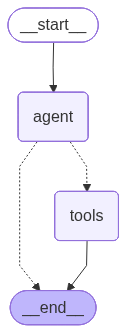

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke({"messages": ["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='d5e68422-d0d9-41fe-b612-93901f66de71'),
  AIMessage(content="I'm functioning properly, thank you for asking.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 213, 'total_tokens': 224, 'completion_time': 0.018521392, 'completion_tokens_details': None, 'prompt_time': 0.012387893, 'prompt_tokens_details': None, 'queue_time': 0.005168329, 'total_time': 0.030909285}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c13-cfe4-7c73-b509-2d7f721aa100-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 213, 'output_tokens': 11, 'total_tokens': 224})]}

In [ ]:
app.invoke({"messages": ["what is the weather in sf"]})

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='c26e57c7-a132-4829-bcb2-17c10e28ef5e'),
  AIMessage(content='<brave_search> {"query": "San Francisco weather"} </brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 214, 'total_tokens': 232, 'completion_time': 0.045485302, 'completion_tokens_details': None, 'prompt_time': 0.012910473, 'prompt_tokens_details': None, 'queue_time': 0.005472273, 'total_time': 0.058395775}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c13-d944-7431-906e-6bccb854b750-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 214, 'output_tokens': 18, 'total_tokens': 232})]}

In [ ]:
for output in app.stream({"messages": ["what is the weather in sf"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='<brave_search> {"query": "sf weather"} </brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 214, 'total_tokens': 231, 'completion_time': 0.040975893, 'completion_tokens_details': None, 'prompt_time': 0.013968994, 'prompt_tokens_details': None, 'queue_time': 0.005487881, 'total_time': 0.054944887}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c13-ecbe-7060-87fa-b79aec9ad163-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 214, 'output_tokens': 17, 'total_tokens': 231})]}




### **Lets create a loop now**

In [ ]:
workflow.add_edge("tools", 'agent')


Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [ ]:
app = workflow.compile()

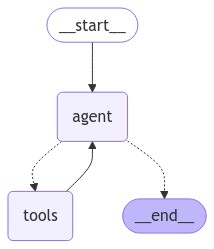

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
for output in app.stream({"messages": ["what is the weather in sf"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='<brave_search> {"query": "san francisco weather"} </brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 214, 'total_tokens': 233, 'completion_time': 0.045973546, 'completion_tokens_details': None, 'prompt_time': 0.013925397, 'prompt_tokens_details': None, 'queue_time': 0.009289231, 'total_time': 0.059898943}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c14-851c-7db2-be1a-8bd46149dd94-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 214, 'output_tokens': 19, 'total_tokens': 233})]}




#### **Strating Phase 3 from here with memory and checkpointing**

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [ ]:
# Define a new graph
workflow3 = StateGraph(MessagesState)

workflow3.add_node("agent", call_model)
workflow3.add_node("tools", tool_node)

workflow3.add_edge(START, "agent")

workflow3.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

workflow3.add_edge("tools", 'agent')

app3 = workflow3.compile(checkpointer = memory)

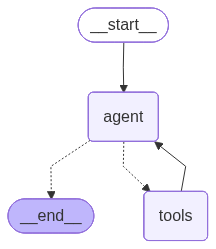

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
config = {"configurable": {"thread_id": "1"}}

In [ ]:
events = app3.stream(
    {"messages": ["Hi there! My name is Suresh beekhani."]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    event["messages"][-1].pretty_print()

In [ ]:
events = app3.stream(
    {"messages": ["can you tell me what was my name?"]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    event["messages"][-1].pretty_print()

In [ ]:
config

{'configurable': {'thread_id': '1'}}

In [ ]:
memory.get(config)

{'v': 4,
 'ts': '2026-02-08T07:09:43.354515+00:00',
 'id': '1f104bd2-489f-6037-8007-fa58bdff2062',
 'channel_versions': {'__start__': '00000000000000000000000000000008.0.5386582390721242',
  'messages': '00000000000000000000000000000009.0.6294094106237776',
  'branch:to:agent': '00000000000000000000000000000009.0.6294094106237776'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000007.0.8819053965781969'},
  'agent': {'branch:to:agent': '00000000000000000000000000000008.0.5386582390721242'}},
 'updated_channels': ['messages'],
 'channel_values': {'messages': [HumanMessage(content='Hi there! My name is Sunny.', additional_kwargs={}, response_metadata={}, id='2b766bfb-df42-406e-8a1a-dd382da76589'),
   AIMessage(content="It's nice to meet you, Sunny. Is there anything I can help you with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 216, 'total_tokens': 236, 'completion_time': 0.024

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")